## Dataset Bias Mitigation: Resampling 
Oversampling or undersampling can help mitigate bias in machine learning models, especially when dealing with imbalanced datasets. 

1. The breakdown of gender in the dataset:
```
sex
male     3743
female    995
```
2. based on RFS, the top ranking feature that is the most important in predicting violent Recividism Score produced by COMPAS in the logistic regression are: 
```
          Feature    Weight
           0             sex  0.717787
           2  juv_misd_count  0.563509
```

3. based on RFS, the two important feature in prediciting two year recividism collected by Prolific are:
- Selected Features: ['sex', 'age_cat']
- Accuracy: 0.8343881856540084





In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.utils import resample

In [7]:
compas = pd.read_csv('data/compas-scores-two-years-violent.csv')
compas.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,1
2,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0,0
3,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,Low,2013-03-26,NaN,NaN,2,0,1102,0,0,0
4,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0,0


In [8]:
compas['c_jail_in'] = pd.to_datetime(compas['c_jail_in'], format='mixed')
compas['c_jail_out'] = pd.to_datetime(compas['c_jail_out'], format='mixed')

compas['v_screening_date'] = pd.to_datetime(compas['v_screening_date'], format='mixed')
compas['vr_offense_date'] = pd.to_datetime(compas['vr_offense_date'], format='mixed')

compas['c_offense_date'] = pd.to_datetime(compas['c_offense_date'], format='mixed')
compas['c_arrest_date'] = pd.to_datetime(compas['c_arrest_date'], format='mixed')

compas['compas_screening_date'] = pd.to_datetime(compas['compas_screening_date'], format='mixed')

In [9]:
compas = compas.drop(['first','last','c_case_number','c_charge_degree', 'c_charge_desc', 'r_case_number','r_charge_degree','vr_case_number','vr_charge_degree','start','end','event'],axis=1)

#remove row with nan scores 
compas = compas.loc[compas['score_text'].notnull()]
#clean out the "-1" decile score from dataset 
compas = compas.loc[compas['v_decile_score'] != -1]

#label encodimg
compas['sex'] = compas['sex'].replace({'Male': 1, 'Female': 0})
compas['score_text'] = compas['score_text'].replace({'Low':0, 'Medium':1, 'High': 2})

#days in jail
compas['jail_out- jail_in'] = (compas['c_jail_out'] - compas['c_jail_in']).dt.days

## Resampling: Oversampling the Minority Races to match with the top race 

In [10]:
compas_race = compas['race'].value_counts()
compas_race

race
African-American    2266
Caucasian           1697
Hispanic             458
Other                279
Asian                 27
Native American       11
Name: count, dtype: int64

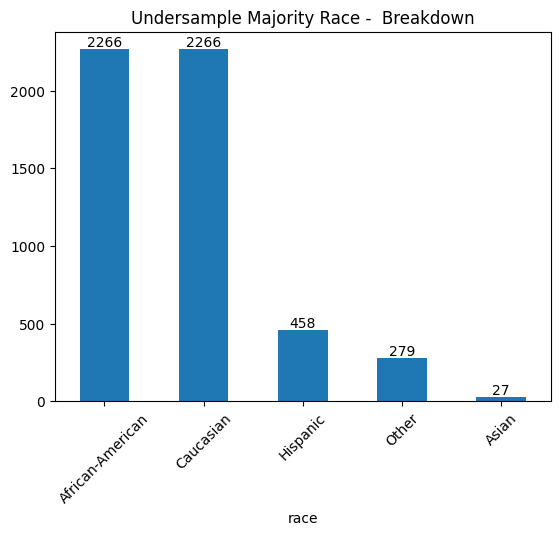

In [15]:
compas_race = compas['race'].value_counts()
target_count = compas_race.max()

african_american = compas[compas['race'] == 'African-American']
caucasian = compas[compas['race'] == 'Caucasian']
hispanic = compas[compas['race'] == 'Hispanic']
other = compas[compas['race'] == 'Other']
asian = compas[compas['race'] == 'Asian']
native_american = compas[compas['race'] == ' Native American']


african_american_r = resample(african_american, replace=True, n_samples=target_count)
caucasian_r = resample(caucasian, replace=True, n_samples=target_count)
#hispanic_r = resample(hispanic, replace=True, n_samples=target_count)

compas_resampled = pd.concat([african_american_r,caucasian_r, hispanic, other,asian, native_american])
compas_resampled = compas_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

compas_resampled['race'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Undersample Majority Race -  Breakdown")

for i, value in enumerate(compas_resampled['race'].value_counts()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

#compas_resampled.to_csv('oversample_t2.csv', index=False)

## Resampling: Undersample 

In [10]:
ret = compas['race'].value_counts()
ret['Caucasian']

1697

1697


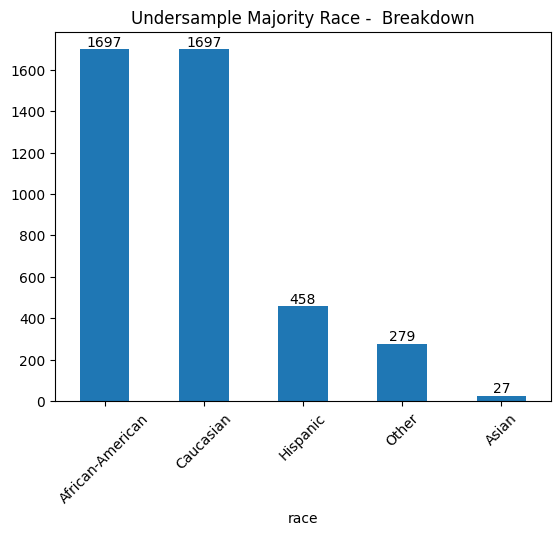

In [16]:
compas_race = compas['race'].value_counts()
target_count = compas_race['Caucasian']
print(target_count)
african_american = compas[compas['race'] == 'African-American']
caucasian = compas[compas['race'] == 'Caucasian']
hispanic = compas[compas['race'] == 'Hispanic']
other = compas[compas['race'] == 'Other']
asian = compas[compas['race'] == 'Asian']
native_american = compas[compas['race'] == ' Native American']


african_american_r = resample(african_american, replace=True, n_samples=target_count)
#caucasian_r = resample(caucasian, replace=True, n_samples=target_count)
#hispanic_r = resample(hispanic, replace=True, n_samples=target_count)

compas_resampled = pd.concat([african_american_r,caucasian, hispanic, other,asian, native_american])
compas_resampled = compas_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

compas_resampled['race'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Undersample Majority Race -  Breakdown")

for i, value in enumerate(compas_resampled['race'].value_counts()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [12]:
compas_resampled.to_csv('undersample_t2.csv', index=False)

### Resampling: Gender 


In [13]:
compas['sex'].value_counts()

1    3743
0     995
Name: sex, dtype: int64

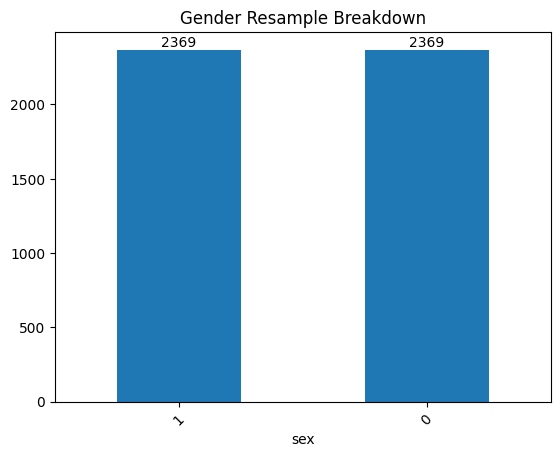

In [17]:
compas_sex = compas['sex'].value_counts()
target = compas_sex.sum() //2

male = compas[compas['sex'] == 1]
female = compas[compas['sex'] == 0]

male_r = resample(male, replace=True, n_samples=target)
female_r = resample(female, replace=True, n_samples=target)
compas_sex_resample = pd.concat([male_r, female_r])
compas_sex_resample = compas_sex_resample.sample(frac=1, random_state=42).reset_index(drop=True)
compas_sex_resample['sex'].value_counts().plot(kind='bar')

plt.xticks(rotation=45)
plt.title("Gender Resample Breakdown")

for i, value in enumerate(compas_sex_resample['sex'].value_counts()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.show()
#compas_sex_resample.to_csv('combined_resample.csv',index=False)

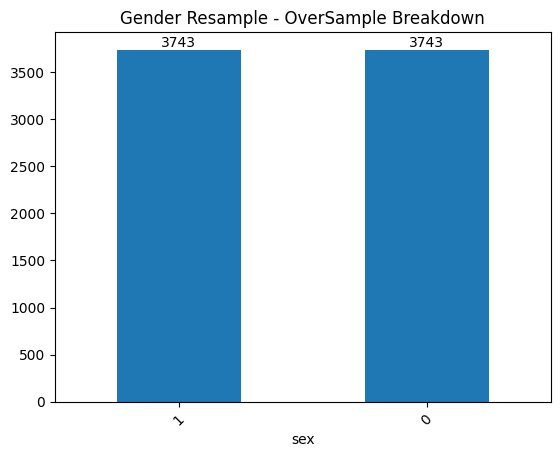

In [18]:
compas_sex = compas['sex'].value_counts()
target = compas_sex.max()

male = compas[compas['sex'] == 1]
female = compas[compas['sex'] == 0]

male_r = resample(male, replace=True, n_samples=target)
female_r = resample(female, replace=True, n_samples=target)
compas_sex_resample = pd.concat([male_r, female_r])
compas_sex_resample = compas_sex_resample.sample(frac=1, random_state=42).reset_index(drop=True)
compas_sex_resample['sex'].value_counts().plot(kind='bar')

plt.xticks(rotation=45)
plt.title("Gender Resample - OverSample Breakdown")

for i, value in enumerate(compas_sex_resample['sex'].value_counts()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.show()
#compas_sex_resample.to_csv('over_resample.csv',index=False)

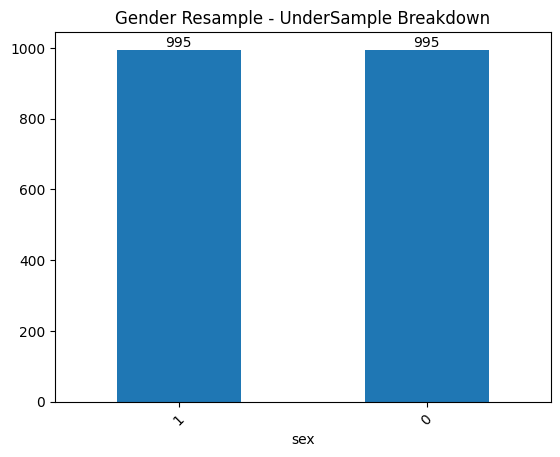

In [20]:
compas_sex = compas['sex'].value_counts()
target = compas_sex.min()

male = compas[compas['sex'] == 1]
female = compas[compas['sex'] == 0]

male_r = resample(male, replace=True, n_samples=target)
female_r = resample(female, replace=True, n_samples=target)
compas_sex_resample = pd.concat([male_r, female_r])
compas_sex_resample = compas_sex_resample.sample(frac=1, random_state=42).reset_index(drop=True)
compas_sex_resample['sex'].value_counts().plot(kind='bar')

plt.xticks(rotation=45)
plt.title("Gender Resample - UnderSample Breakdown")

for i, value in enumerate(compas_sex_resample['sex'].value_counts()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.show()
#compas_sex_resample.to_csv('under_resample.csv',index=False)

<Axes: xlabel='age_cat'>

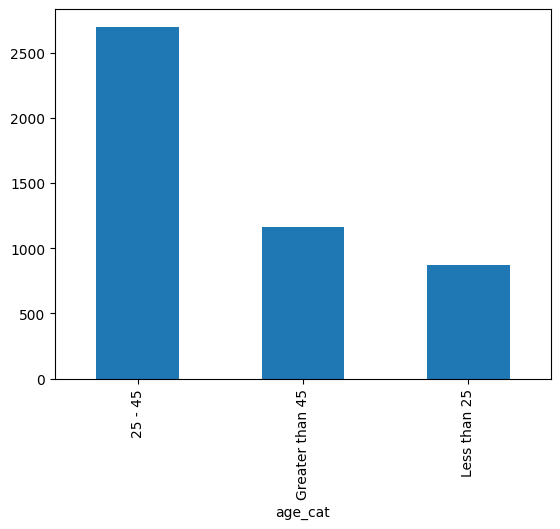

In [26]:
compas['age_cat'].value_counts().plot(kind='bar')

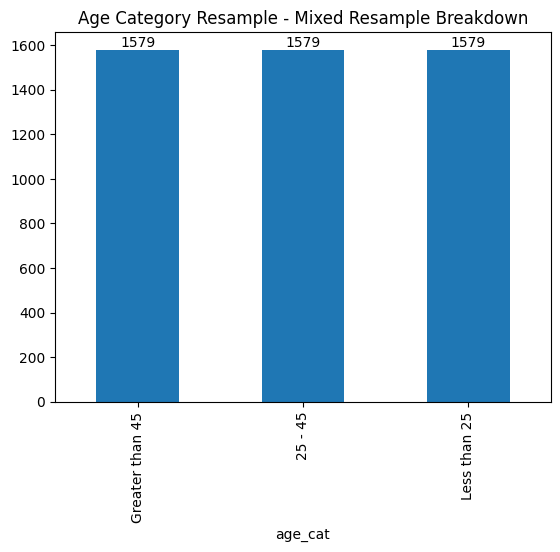

In [27]:
compas_age_cat = compas['age_cat'].value_counts()
target = compas_age_cat.sum() // 3

min = compas[compas['age_cat'] == '25 - 45']
middle = compas[compas['age_cat'] == 'Greater than 45']
top = compas[compas['age_cat'] == 'Less than 25']

min_r = resample(min, replace=True, n_samples=target)
middle_r = resample(middle, replace=True, n_samples=target)
top_r = resample(top, replace=True, n_samples=target)

compas_age_cat_resampled = pd.concat([min_r, middle_r, top_r])
compas_age_cat_resampled = compas_age_cat_resampled.sample(frac=1, random_state=42).reset_index(drop=True)
compas_age_cat_resampled['age_cat'].value_counts().plot(kind='bar')

plt.title("Age Category Resample - Mixed Resample Breakdown")

for i, value in enumerate(compas_age_cat_resampled['age_cat'].value_counts()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

#compas_age_cat_resampled.to_csv('age_mixed_resample.csv',index=False)